In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.tree import DecisionTreeRegressor as DT

In [2]:
n = 5000
df = pd.DataFrame()
df['age'] = np.random.randint(25, 76, size=n)

In [3]:
df

,age
0,61
1,42
2,67
3,25
4,64
...,...
4995,30
4996,53
4997,35
4998,63


In [4]:
a=-10.5
b=0.05
timeout = 365*3

In [5]:
prob_values = 1/(1+np.exp(-a-b*df['age']))

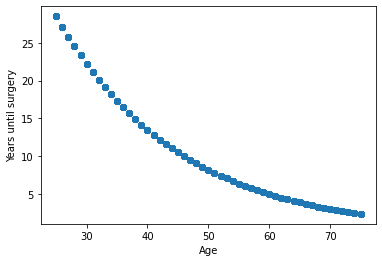

In [6]:
plt.scatter(df['age'],1/(365*prob_values))
plt.xlabel('Age')
plt.ylabel('Years until surgery');

In [7]:
days = geom(prob_values).rvs()
df['observation'] = np.where(days <= timeout, days, np.nan)
df

,age,observation
0,61,1018.0
1,42,777.0
2,67,66.0
3,25,NaN
4,64,NaN
...,...,...
4995,30,NaN
4996,53,282.0
4997,35,NaN
4998,63,548.0


In [8]:
(df['observation'].isna()).mean()

0.6564

In [9]:
days.max()/365

200.48767123287672

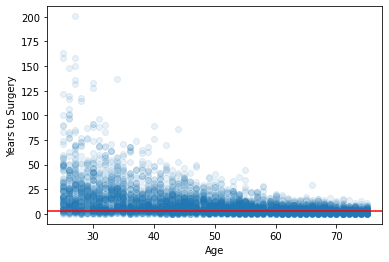

In [10]:
plt.scatter(df['age'],days/365, alpha=.1)
plt.axhline(timeout/365, color='red')
plt.xlabel('Age')
plt.ylabel('Years to Surgery');

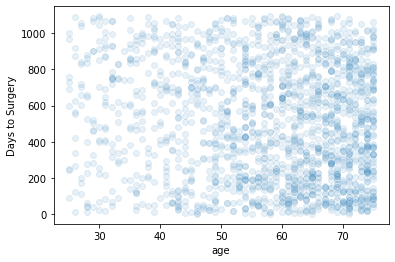

In [11]:
plt.scatter(df['age'], df['observation'], alpha = .1)
plt.xlabel('age')
plt.ylabel('Days to Surgery');

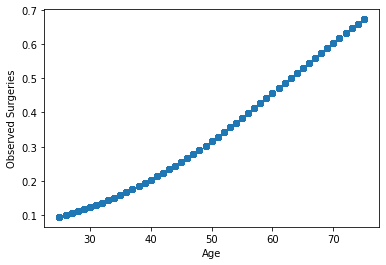

In [12]:
S = LogR().fit(df[['age']],df['observation'].isna()).predict_proba(df[['age']])[:,0]
plt.scatter(df['age'], S)
plt.xlabel('Age')
plt.ylabel('Observed Surgeries');

In [13]:
df['imputed_days'] = np.where(df['observation'].isna(), timeout + (1/(1-(1-S)**(1/timeout))), df['observation'])
df

,age,observation,imputed_days
0,61,1018.0,1018.000000
1,42,777.0,777.000000
2,67,66.0,66.000000
3,25,NaN,12219.366817
4,64,NaN,2602.692315
...,...,...,...
4995,30,NaN,9478.557601
4996,53,282.0,282.000000
4997,35,NaN,7445.014843
4998,63,548.0,548.000000


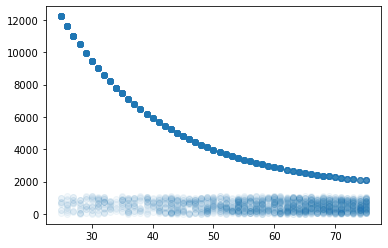

In [14]:
plt.scatter(df['age'], df['imputed_days'], alpha = .05)

In [15]:
df['probability'] = 1/DT().fit(df[['age']], df['imputed_days']).predict(df[['age']])
df

,age,observation,imputed_days,probability
0,61,1018.0,1018.000000,0.000596
1,42,777.0,777.000000,0.000228
2,67,66.0,66.000000,0.000705
3,25,NaN,12219.366817,0.000090
4,64,NaN,2602.692315,0.000656
...,...,...,...,...
4995,30,NaN,9478.557601,0.000120
4996,53,282.0,282.000000,0.000365
4997,35,NaN,7445.014843,0.000155
4998,63,548.0,548.000000,0.000682


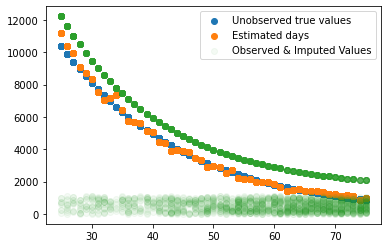

In [16]:
plt.scatter(df['age'],1/prob_values, label = 'Unobserved true values');
plt.scatter(df['age'], 1/df['probability'], label = 'Estimated days')
plt.scatter(df['age'], df['imputed_days'], alpha = .05, label = 'Observed & Imputed Values')
plt.legend()

In [17]:
log_odds = np.log(df['probability']/(1-df['probability']))
log_odds

0      -7.425444
1      -8.387103
2      -7.256673
3      -9.320209
4      -7.329269
          ...   
4995   -9.027331
4996   -7.914154
4997   -8.769258
4998   -7.289848
4999   -9.071717
Name: probability, Length: 5000, dtype: float64

In [18]:
lr = LR().fit(df[['age']], log_odds)

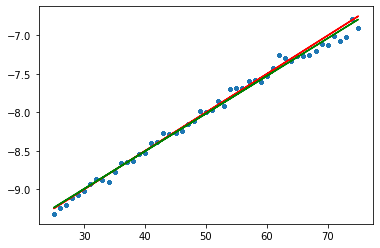

In [19]:
plt.scatter(df['age'], log_odds, s=10)
plt.plot(df['age'], df['age']*b+a, color = 'red')
plt.plot(df['age'], lr.predict(df[['age']]), color = 'green');

In [20]:
lr.intercept_, a

(-10.461420934991455, -10.5)

In [21]:
lr.coef_, b

(array([0.048924]), 0.05)

In [ ]:
df['target']= df['probability'].apply(lambda p:geom(p).cdf(18*30)-geom(p).cdf(6*30))
df

In [ ]:
plt.scatter(df['age'], df['target'])
ages = np.linspace(20, 80)
plt.plot(ages, np.exp(LR().fit(np.log(df[['age']]),
                                       np.log(df['target'])
                                      )
                              .predict(np.log(ages.reshape(-1,1)))),
                            color = 'red');
